# Spaceship Titanic

Author: HanChen Wang  
Date: Jan 3 2023  
Link to original data [link](https://www.kaggle.com/competitions/spaceship-titanic/data)  

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.  

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.  

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!  

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.  

Help save them and change history!


## Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions
**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.  
`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  
`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.  
`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  
`Destination` - The planet the passenger will be debarking to.  
`Age` - The age of the passenger.  
`VIP` - Whether the passenger has paid for special VIP service during the voyage.  
`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
`Name` - The first and last names of the passenger.  
`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  


**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.  


**sample_submission.csv** - A submission file in the correct format.  
`PassengerId` - Id for each passenger in the test set.  
`Transported` - The target. For each passenger, predict either True or False.  

In [58]:
# Loading the data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import altair as alt
# from altair_data_server import data_server

# # Save a vega-lite spec and a PNG blob for each plot in the notebook
# alt.renderers.enable('mimetype')
# # Handle large data sets without embedding them in the notebook
# alt.data_transformers.enable('data_server')

train_df = pd.read_csv("data/raw/train.csv")
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [59]:
# There are 8693 passenger records. The `train_df` is selected from two-thrids of the entire passenger list. 
# There are missing values for all features except `PassengerID` and the target `Transported`
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [60]:
# Let's look at the target first. This is a binary feature. We can visualize it with a frequency table.
# About half of the passengers in the train_df are transported away.

# We can now use the target with each feature to see if there are trends/relationships. 
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [61]:
# Let's look at the `PassengerId` column first. We can get how many groups are there, and min, avg, and max
# members per group.

# There are 6217 groups in the train_df, and up to 8 members per group (groupId 4498). Most groups has only 
# 1 member.

train_df[['groupId', 'memberId']] = train_df["PassengerId"].str.split('_', expand=True).values
train_df[['groupId', 'memberId']].describe()

,groupId,memberId
count,8693,8693
unique,6217,8
top,4498,01
freq,8,6217


#### Let's look at the `HomePlanet` feature. This is a categorical feature. We can visualize it with a frequency table. More passengers seem to come from Earth than Europa or Mars. In the train_df, Europa has more transported passengers than non-transported, Earth has more non-transported, and Mars has slightly more transported. 

In [62]:
train_df[['HomePlanet','Transported']].value_counts(sort=False)

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
dtype: int64

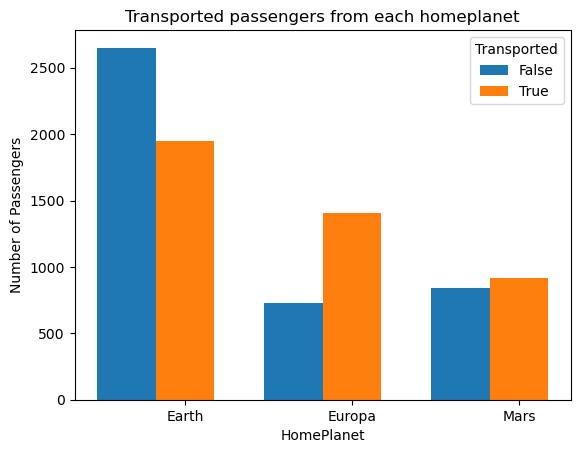

In [63]:
# Group the data by 'HomePlanet' and 'Transported' and calculate the count
grouped_df = train_df.groupby(["HomePlanet", "Transported"]).size().reset_index(name="count")

# Set up the figure and axis
fig, ax = plt.subplots()

# Get unique home planets and transported values
homeplanets = grouped_df["HomePlanet"].unique()
transported_values = grouped_df["Transported"].unique()

# Calculate the width for each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
x = np.arange(len(homeplanets))

# Plot the bars for each 'HomePlanet' and 'Transported' value side by side
for i, transported in enumerate(transported_values):
    transported_df = grouped_df[grouped_df["Transported"] == transported]
    counts = transported_df[transported_df["HomePlanet"].isin(homeplanets)]["count"]
    ax.bar(x + (i * bar_width), counts, label=transported, width=bar_width)

# Set plot title and axis labels
ax.set_title("Transported passengers from each homeplanet")
ax.set_xlabel("HomePlanet")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(x + (bar_width * len(transported_values)) / 2)
ax.set_xticklabels(homeplanets)

# Add legend
ax.legend(title="Transported", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


#### Let's look at the `CryoSleep` feature. This is a binary feature. We can visualize it with a frequency table. More than half of passengers who chose cryosleep were transported. Less than half of passengers who didn't elect into cryosleep were transported. 

In [64]:
train_df[['CryoSleep','Transported']].value_counts()

CryoSleep  Transported
False      False          3650
True       True           2483
False      True           1789
True       False           554
dtype: int64

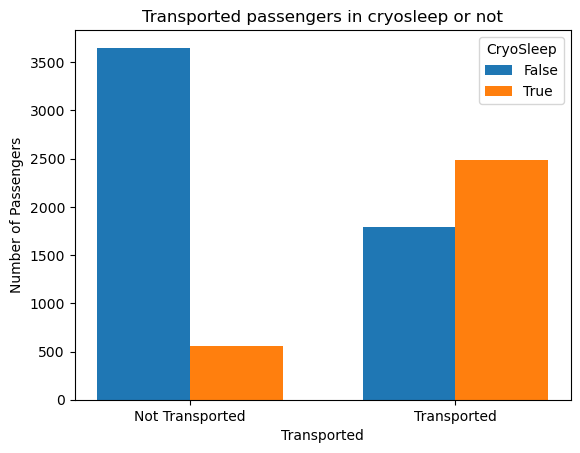

In [65]:
# Group the data by 'CryoSleep' and 'Transported' and calculate the count
grouped_df = train_df.groupby(["CryoSleep", "Transported"]).size().reset_index(name="count")

# Set up the figure and axis
fig, ax = plt.subplots()

# Get unique categories for 'CryoSleep'
cryo_sleep_categories = grouped_df["CryoSleep"].unique()

# Calculate the width for each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
x = np.arange(len(cryo_sleep_categories))

# Plot the bars for each 'CryoSleep' category side by side
for i, sleep_status in enumerate(cryo_sleep_categories):
    sleep_df = grouped_df[grouped_df["CryoSleep"] == sleep_status]
    ax.bar(x + (i * bar_width), sleep_df["count"], label=sleep_status, width=bar_width)

# Set plot title and axis labels
ax.set_title("Transported passengers in cryosleep or not")
ax.set_xlabel("Transported")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["Not Transported", "Transported"])

# Add legend
ax.legend(title="CryoSleep", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


#### Let's look at the `Cabin` feature. This is a merged feature. We could split it into three features named deck, cain_num, and side (with P for Port, and S for Starboard). We can visualize it with a frequency table.


In [66]:
cabinsplit = pd.DataFrame(
    train_df["Cabin"].str.split("/", expand=True).values,
    columns=["Deck", "Cabin_num", "Side"],
)
cabinsplit.value_counts()

Deck  Cabin_num  Side
G     734        S       8
C     21         P       7
G     1368       P       7
B     82         S       7
G     981        S       7
                        ..
F     1245       P       1
      1244       S       1
      1243       S       1
                 P       1
T     3          P       1
Length: 6560, dtype: int64

In [67]:
# We can make this change to the train_df since
train_df[["Deck", "Cabin_num", "Side"]] = (
    train_df["Cabin"].str.split("/", expand=True).values
)

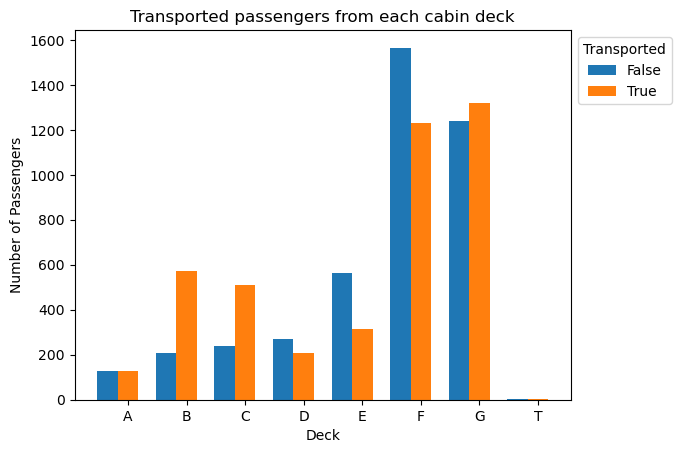

In [68]:
# Group the data by 'Deck' and 'Transported' and calculate the count
grouped_df = train_df.groupby(["Deck", "Transported"]).size().reset_index(name="count")

# Get unique decks and transported values
decks = grouped_df["Deck"].unique()
transported_values = grouped_df["Transported"].unique()

# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
x = pd.Series(range(len(decks)))

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each 'Deck' and 'Transported' value side by side
for i, transported in enumerate(transported_values):
    transported_df = grouped_df[grouped_df["Transported"] == transported]
    counts = transported_df[transported_df["Deck"].isin(decks)]["count"]
    ax.bar(x + (i * bar_width), counts, width=bar_width, label=transported)

# Set plot title and axis labels
ax.set_title("Transported passengers from each cabin deck")
ax.set_xlabel("Deck")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(x + (bar_width * len(transported_values)) / 2)
ax.set_xticklabels(decks)

# Add legend
ax.legend(title="Transported", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


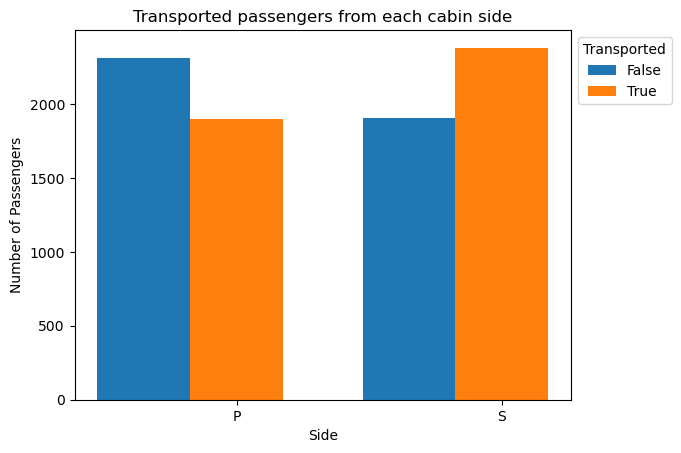

In [69]:
# Group the data by 'Side' and 'Transported' and calculate the count
grouped_df = train_df.groupby(["Side", "Transported"]).size().reset_index(name="count")

# Get unique sides and transported values
sides = grouped_df["Side"].unique()
transported_values = grouped_df["Transported"].unique()

# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
x = pd.Series(range(len(sides)))

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each 'Side' and 'Transported' value side by side
for i, transported in enumerate(transported_values):
    transported_df = grouped_df[grouped_df["Transported"] == transported]
    counts = transported_df[transported_df["Side"].isin(sides)]["count"]
    ax.bar(x + (i * bar_width), counts, width=bar_width, label=transported)

# Set plot title and axis labels
ax.set_title("Transported passengers from each cabin side")
ax.set_xlabel("Side")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(x + (bar_width * len(transported_values)) / 2)
ax.set_xticklabels(sides)

# Add legend
ax.legend(title="Transported", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


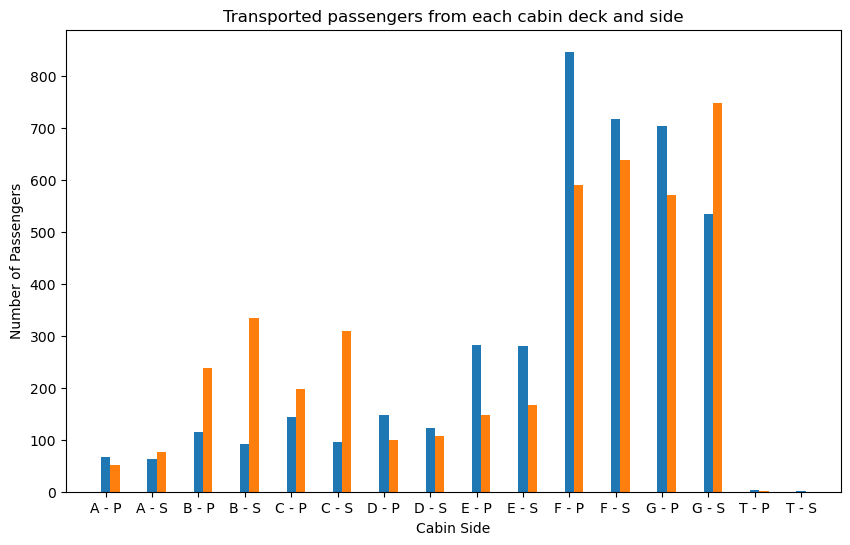

In [70]:
# Group the data by 'Deck', 'Side', and 'Transported' and calculate the count
grouped_df = train_df.groupby(["Deck", "Side", "Transported"]).size().reset_index(name="count")

# Get unique decks, sides, and transported values
decks = grouped_df["Deck"].unique()
sides = grouped_df["Side"].unique()
transported_values = grouped_df["Transported"].unique()

# Set the width of each bar
bar_width = 0.2

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as desired

# Define color mapping for binary values of "Transported"
color_mapping = {0: "#1f77b4", 1: "#ff7f0e"}

# Plot the bars for each 'Deck', 'Side', and 'Transported' value side by side
for i, transported in enumerate(transported_values):
    for j, deck in enumerate(decks):
        deck_df = grouped_df[grouped_df["Deck"] == deck]
        for k, side in enumerate(sides):
            side_df = deck_df[deck_df["Side"] == side]
            counts = side_df[side_df["Transported"] == transported]["count"]
            ax.bar((j * len(sides)) + k + (i * bar_width), counts, width=bar_width,
                   color=color_mapping[transported])

# Set plot title and axis labels
ax.set_title("Transported passengers from each cabin deck and side")
ax.set_xlabel("Cabin Side")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(range(len(decks) * len(sides)))
ax.set_xticklabels([f"{deck} - {side}" for deck in decks for side in sides])

# Remove legend
ax.legend().remove()

# Show the plot
plt.show()


#### Let's look at the `Destination` feature. This is a categorical feature. We can visualize it with a frequency table. Similar nubmer of passengers to each destination was transported. An exception is in passengers going to `55 Cancri e` more were transported. 

In [71]:
train_df[['Destination','Transported']].value_counts()

Destination    Transported
TRAPPIST-1e    False          3128
               True           2787
55 Cancri e    True           1098
               False           702
PSO J318.5-22  True            401
               False           395
dtype: int64

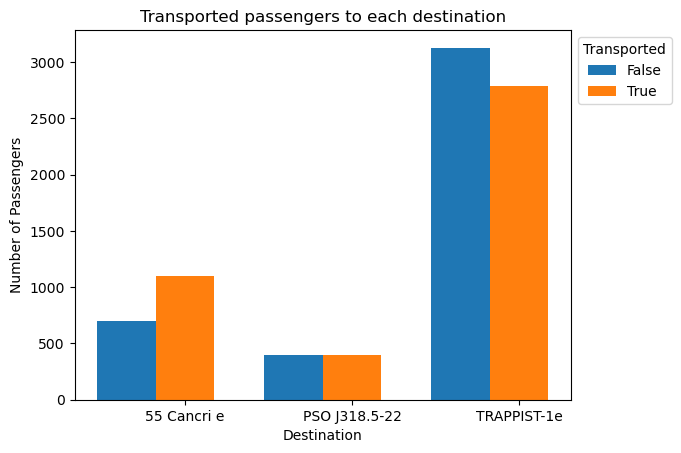

In [72]:
# Group the data by 'Destination' and 'Transported' and calculate the count
grouped_df = train_df.groupby(["Destination", "Transported"]).size().reset_index(name="count")

# Get unique destinations and transported values
destinations = grouped_df["Destination"].unique()
transported_values = grouped_df["Transported"].unique()

# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
x = pd.Series(range(len(destinations)))

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each 'Destination' and 'Transported' value side by side
for i, transported in enumerate(transported_values):
    transported_df = grouped_df[grouped_df["Transported"] == transported]
    counts = transported_df[transported_df["Destination"].isin(destinations)]["count"]
    ax.bar(x + (i * bar_width), counts, width=bar_width, label=transported)

# Set plot title and axis labels
ax.set_title("Transported passengers to each destination")
ax.set_xlabel("Destination")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(x + (bar_width * len(transported_values)) / 2)
ax.set_xticklabels(destinations)

# Add legend
ax.legend(title="Transported", bbox_to_anchor=(1, 1))



#### Let's look at the `Age` feature. This is a numerical feature. We can visualize it with a histogram. Age doesn't seem to be a driving factor for determining transported or not. 

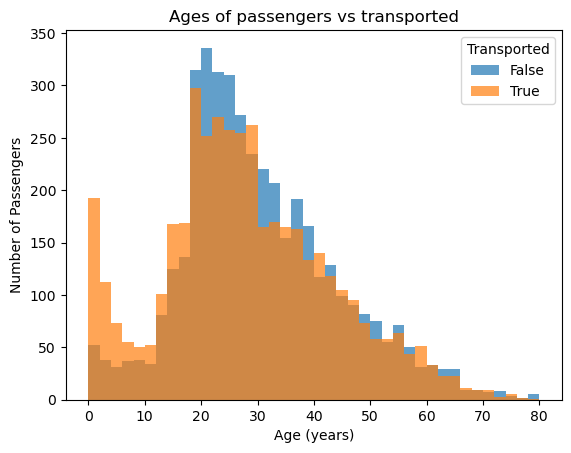

In [73]:
# Set up the figure and axis
fig, ax = plt.subplots()

# Define the bin edges for age bins
bins = range(0, 81, 2)  # Adjust bin range and width as desired

# Plot the histogram bars for each 'Transported' value side by side
for transported in train_df["Transported"].unique():
    transported_df = train_df[train_df["Transported"] == transported]
    ax.hist(transported_df["Age"], bins=bins, label=transported, alpha=0.7)

# Set plot title and axis labels
ax.set_title("Ages of passengers vs transported")
ax.set_xlabel("Age (years)")
ax.set_ylabel("Number of Passengers")

# Add legend
ax.legend(title="Transported")

# Show the plot
plt.show()


#### Let's look at the `VIP` feature. This is a binary feature. We can visualize it with a frequency table. Similar proportion of VIP and non-VIP passengers were transported. 

In [74]:
train_df[['VIP','Transported']].value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
dtype: int64

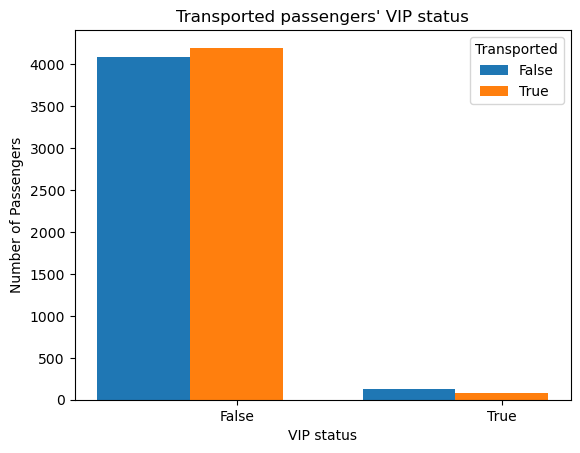

In [75]:
# Group the data by 'VIP' and 'Transported' and calculate the count
grouped_df = train_df.groupby(["VIP", "Transported"]).size().reset_index(name="count")

# Get unique VIP statuses and transported values
vip_statuses = grouped_df["VIP"].unique()
transported_values = grouped_df["Transported"].unique()

# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
x = pd.Series(range(len(vip_statuses)))

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each 'VIP' and 'Transported' value side by side
for i, transported in enumerate(transported_values):
    transported_df = grouped_df[grouped_df["Transported"] == transported]
    counts = transported_df[transported_df["VIP"].isin(vip_statuses)]["count"]
    ax.bar(x + (i * bar_width), counts, width=bar_width, label=transported)

# Set plot title and axis labels
ax.set_title("Transported passengers' VIP status")
ax.set_xlabel("VIP status")
ax.set_ylabel("Number of Passengers")

# Set the x-axis tick positions and labels
ax.set_xticks(x + (bar_width * len(transported_values)) / 2)
ax.set_xticklabels(vip_statuses)

# Add legend
ax.legend(title="Transported", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


#### Let's look at these numerical features `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` together, since they are billed amount from passengers' spending on the spaceship. 


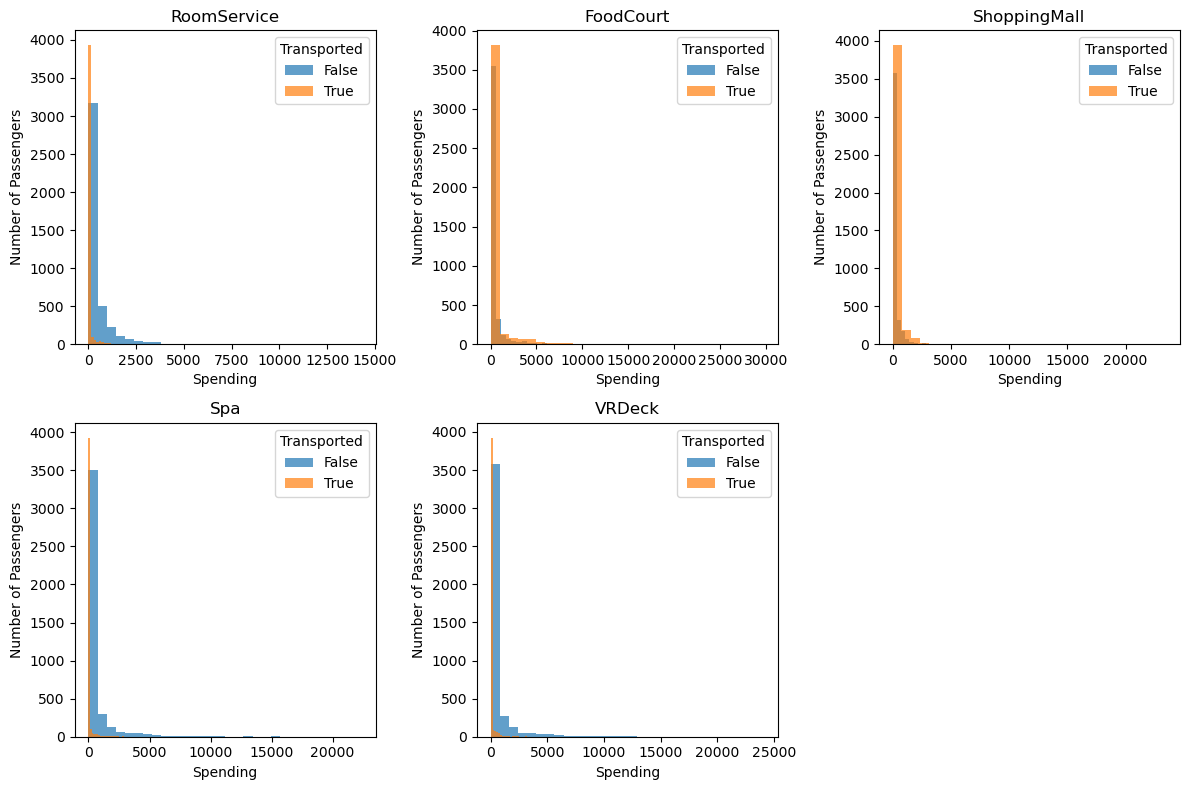

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'train_df' is a pandas DataFrame containing the data

# Define the columns to include in the plot
columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the bars for each column side by side
for i, column in enumerate(columns):
    ax = axes[i]
    transported_values = train_df["Transported"].unique()
    
    # Iterate over transported values
    for transported in transported_values:
        transported_df = train_df[train_df["Transported"] == transported]
        ax.hist(transported_df[column], bins=30, alpha=0.7, label=transported)
    
    # Set plot title and axis labels
    ax.set_title(column)
    ax.set_xlabel("Spending")
    ax.set_ylabel("Number of Passengers")
    
    # Add legend
    ax.legend(title="Transported")

# Remove any extra subplots if there are fewer columns
if len(columns) < len(axes):
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


#### Let's look at the `Name` feature. This is a unique feature since all passengers have different names. We could tranform this into first and last names and investigate if the anomaly targeted a specific family. 

In [77]:
train_df[["FirstName", "LastName"]] = (
    train_df["Name"].str.split(" ", expand=True).values
)
train_df[["FirstName", "LastName"]]

,FirstName,LastName
0,Maham,Ofracculy
1,Juanna,Vines
2,Altark,Susent
3,Solam,Susent
4,Willy,Santantines
...,...,...
8688,Gravior,Noxnuther
8689,Kurta,Mondalley
8690,Fayey,Connon
8691,Celeon,Hontichre


In [78]:
# Looks like there are some passengers' first names that were more transported. 
# Note: this is not a frequency table. It could be that there are just a lot of passengers with first name A.
train_df[["Transported", "FirstName"]].query("Transported==True").value_counts()

Transported  FirstName
True         Minoton      7
             Loree        7
             Dyonon       7
             Jonaye       7
             Betenar      7
                         ..
             Hekaton      1
             Hekarf       1
             Heersh       1
             Heers        1
             Zubeneb      1
Length: 2211, dtype: int64

In [79]:
# Looks like there are some passengers' last names that were more transported. 
# Note: this is not a frequency table. It could be that there are just a lot of passengers with last name A.
train_df[["Transported", "LastName"]].query("Transported==True").value_counts()

Transported  LastName  
True         Domington     14
             Barbes        10
             Mckinsond      9
             Moodsey        9
             Browlerson     9
                           ..
             Imparmle       1
             Impress        1
             Inderad        1
             Ingalt         1
             Youngrayes     1
Length: 1849, dtype: int64

In [80]:
# Let's look at the correlation of the numerical values to the target `Transported`.
# It seems that there are negative trends between passengers' spendings on the spaceship
# and whether they are transported during the anomaly. 
train_df.corr('spearman', numeric_only=True).style.format(precision=2).background_gradient()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.00,0.12,0.21,0.10,0.20,0.18,-0.07
RoomService,0.12,1.00,0.18,0.44,0.25,0.18,-0.37
FoodCourt,0.21,0.18,1.00,0.19,0.49,0.51,-0.19
ShoppingMall,0.10,0.44,0.19,1.00,0.26,0.19,-0.23
Spa,0.20,0.25,0.49,0.26,1.00,0.45,-0.37
VRDeck,0.18,0.18,0.51,0.19,0.45,1.00,-0.35
Transported,-0.07,-0.37,-0.19,-0.23,-0.37,-0.35,1.00


In [81]:
# Exporting the transformed train_df into a new csv file. 
try:
    os.makedirs("data/processed")
except:
    pass
train_df.to_csv("data/processed/train_transformed_step1.csv")

In [82]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,groupId,memberId,Deck,Cabin_num,Side,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,01,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,01,F,0,S,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,01,A,0,S,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,02,A,0,S,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,01,F,1,S,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,9276,01,A,98,P,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,9278,01,G,1499,S,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,9279,01,G,1500,S,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,9280,01,E,608,S,Celeon,Hontichre


# Feature Preprocessing

In [83]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


In [84]:
X_train = train_df.drop('Transported', axis=1)
y_train = train_df['Transported']

In [85]:
# Define the lists of categorical, numerical, and drop features
categorical_feats = [
    'HomePlanet',
    'CryoSleep',
    'Destination',
    'Deck',
    'Side',
    'VIP',
    'FirstName',
    'LastName',
]

numerical_feats = [
    'Age',
    'RoomService',
    'FoodCourt',
    'ShoppingMall',
    'Spa',
    'VRDeck',
    'Cabin_num'
]

drop_feats = [
    'PassengerId',
    'groupId',
    'memberId',
    'Name',
    'Cabin',
]

In [86]:
# Create the column transformer
ct = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False)), categorical_feats),
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_feats),
    ("drop", drop_feats),
)

In [87]:
ct

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'Deck', 'Side', 'VIP', 'FirstName',
                                  'LastName']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck',
                                  'Cabin_num']),
                                ('drop', 'drop',
                                 ['PassengerId', 'groupId', 'memberId', 'Name',
                                  'Cabin'])])

In [112]:
# Create the pipeline
pipeline = Pipeline([
    ('preprocessing', ct)
])

# Fit and transform the data
X_train_transformed = pipeline.fit_transform(X_train)

column_names = (
    pipeline.named_steps['preprocessing'].transformers_[0][1].named_steps['onehotencoder'].get_feature_names_out(pipeline.named_steps['preprocessing'].transformers_[0][2]).tolist()
    + numerical_feats
)
pd.DataFrame(X_train_transformed, columns=column_names)


,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,...,LastName_Yatters,LastName_Yorkland,LastName_Youngrayes,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.177238
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-1.177238
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.177238
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.177238
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,-1.175264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.851410,-0.333105,3.992336,-0.283579,1.189173,-0.197751,-0.983795
8689,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.752431,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.781653
8690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-0.194573,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1.783627
8691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223820,-0.333105,0.376365,-0.283579,0.043013,2.589576,0.022899


In [113]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define advanced classification models to evaluate
models = {
    'Decision Tree (Baseline)': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models using cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores.mean()

# Print the results
for model_name, score in results.items():
    print(f'{model_name}: {score:.4f}')

Decision Tree (Baseline): 0.7619
Random Forest: 0.7878
Gradient Boosting: 0.7883
